In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [4]:
def primesfrom2to(n):
    """ Input n>=6, Returns a array of primes, 2 <= p < n """
    sieve = np.ones(n//3 + (n%6==2), dtype=bool)
    for i in range(1,int(n**0.5)//3+1):
        if sieve[i]:
            k=3*i+1|1
            sieve[       k*k//3     ::2*k] = False
            sieve[k*(k-2*(i&1)+4)//3::2*k] = False
    return np.r_[2,3,((3*np.nonzero(sieve)[0][1:]+1)|1)]

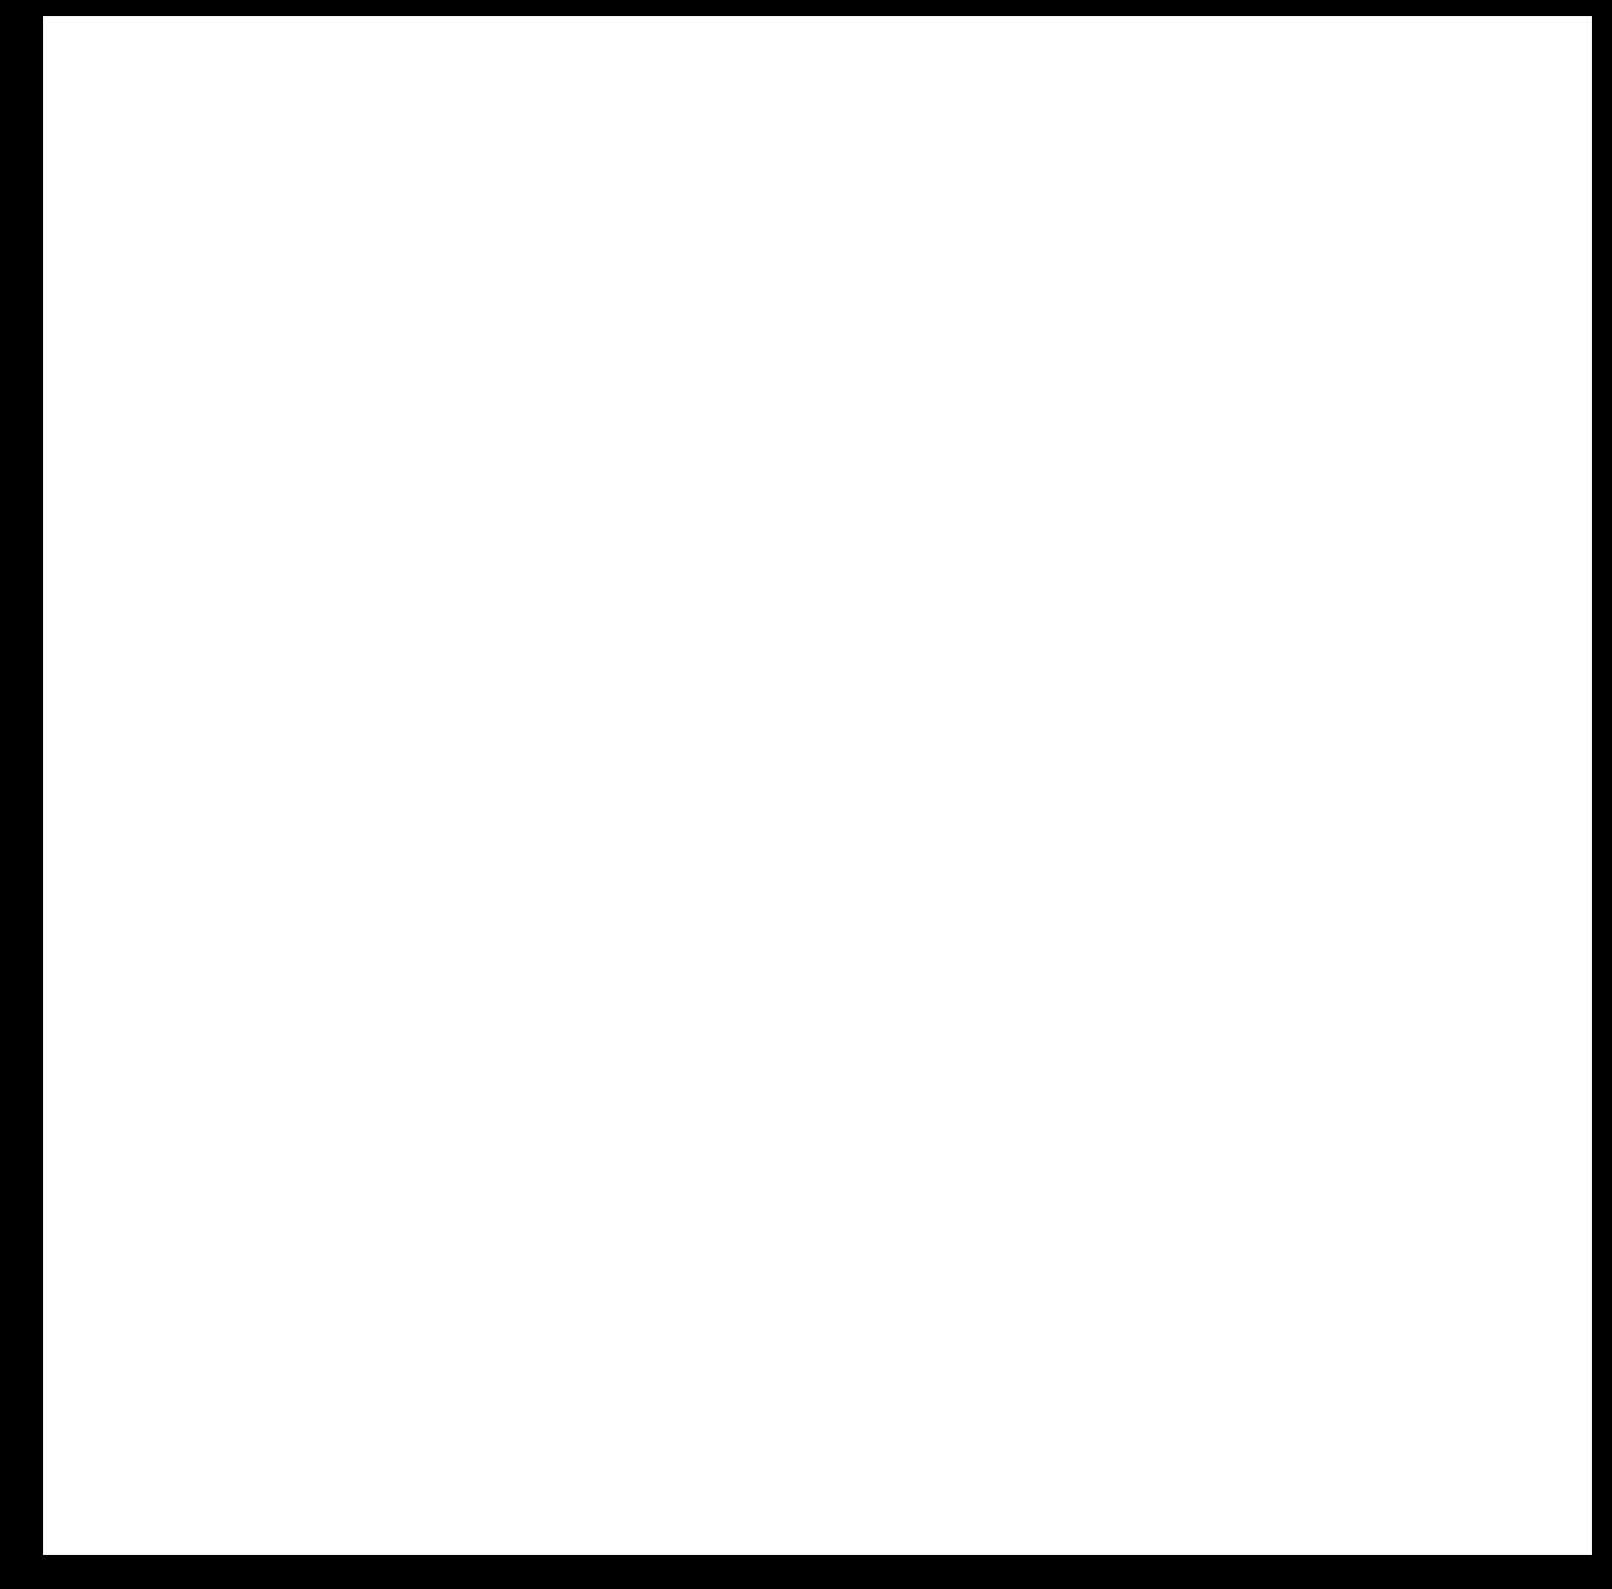

In [6]:
def factors(n):
    return set(reduce(list.__add__,
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))


n = 34040
size = (20,20)#tuple(params['size'])
background = 'black'#params['background']
cmap_name = 'twilight'#params['cmap_name']
# filename = params['filename']
show = True#params['show']

up = False
down = False
left = False
right = True
hor = temp_hor = 1
ver = temp_ver = 1

x = y = 0
primes = set(primesfrom2to(n))
data = np.zeros((n, 4))

for i in range(n):

    data[i][0] = x
    data[i][1] = y

    if (i+1) in primes:
        data[i][2] = 1
        data[i][3] = .2
    else:
        data[i][2] = 0
        data[i][3] = .2*len(factors(i+1))

    if right:
        x += 1
        hor -= 1
        if hor == 0:
            temp_hor += 1
            hor = temp_hor
            up = True
            right = False
    elif up:
        y += 1
        ver -= 1
        if ver == 0:
            temp_ver += 1
            ver = temp_ver
            left = True
            up = False
    elif left:
        x -= 1
        hor -= 1
        if hor == 0:
            temp_hor += 1
            hor = temp_hor
            down = True
            left = False
    elif down:
        y -= 1
        ver -= 1
        if ver == 0:
            temp_ver += 1
            ver = temp_ver
            right = True
            down = False

fig, ax = plt.subplots()
fig.set_size_inches(size)
fig.patch.set_visible(True)
fig.patch.set_facecolor(background)
ax.grid(False)

# plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=data[:, 3], cmap=cmap_name)

# plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=data[:, 3])
# ax.axis('off')

# if filename:
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=400)

if show:
    plt.show()

In [24]:
mask = np.where(data[:,2]==1)

In [18]:
mask[0]

array([    0,     3,     5, ..., 34036, 34037, 34039])

In [35]:
mask = data[:,2]==0

In [36]:
t = data[~mask,2]

In [38]:
data[~mask,3]

array([0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2])